In [8]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras import Input, layers

print(tf.__version__)

2.3.0


In [2]:
#Download and preprocess dataset:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

# Now separate out a validation set.
val_frac = 0.1
num_val_samples = int(len(train_images)*val_frac)
# choose num_val_samples indices up to the size of train_images, !replace => no repeats
val_idxs = np.random.choice(np.arange(len(train_images)), size=num_val_samples, replace=False)
trn_idxs = np.setdiff1d(np.arange(len(train_images)), val_idxs)
val_images = train_images[val_idxs, :,:,:]
train_images = train_images[trn_idxs, :,:,:]

val_labels = train_labels[val_idxs]
train_labels = train_labels[trn_idxs]

train_labels = train_labels.squeeze()
test_labels = test_labels.squeeze()
val_labels = val_labels.squeeze()

input_shape  = train_images.shape[1:]
train_images = train_images / 255.0
test_images  = test_images  / 255.0
val_images   = val_images   / 255.0
print("Training Images range from {:2.5f} to {:2.5f}".format(np.min(train_images), np.max(train_images)))
print("Test     Images range from {:2.5f} to {:2.5f}".format(np.min(test_images), np.max(test_images)))

print(train_images.shape)
print(len(train_labels))
print(test_images.shape)
print(len(test_labels))
print(val_images.shape)
print(len(val_labels))

Training Images range from 0.00000 to 1.00000
Test     Images range from 0.00000 to 1.00000
(45000, 32, 32, 3)
45000
(10000, 32, 32, 3)
10000
(5000, 32, 32, 3)
5000


In [3]:
model1 = tf.keras.Sequential([
    Input(shape=input_shape),
    layers.Conv2D(32, kernel_size=(3,3), activation="relu", padding='same', strides=(2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation="relu", padding='same', strides=(2,2)),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)), 
    layers.Flatten(),
    layers.Dense(1024, activation='relu'),
    layers.Dense(10)
])
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 16, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              1049600   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10250     
Total params: 1,079,242
Trainable params: 1,079,242
Non-trainable params: 0
______________________________________________

In [4]:
train_hist1 = model1.fit(train_images, train_labels, 
                         validation_data=(val_images, val_labels),
                         epochs=50)

Epoch 1/50
1407/1407 [==============================] - 23s 16ms/step - loss: 1.4304 - accuracy: 0.4836 - val_loss: 1.2916 - val_accuracy: 0.5366
Epoch 2/50
1407/1407 [==============================] - 23s 16ms/step - loss: 1.0798 - accuracy: 0.6177 - val_loss: 1.0570 - val_accuracy: 0.6268
Epoch 3/50
1407/1407 [==============================] - 25s 18ms/step - loss: 0.9165 - accuracy: 0.6766 - val_loss: 1.0169 - val_accuracy: 0.6382
Epoch 4/50
1407/1407 [==============================] - 24s 17ms/step - loss: 0.7799 - accuracy: 0.7244 - val_loss: 1.0199 - val_accuracy: 0.6436
Epoch 5/50
1407/1407 [==============================] - 25s 18ms/step - loss: 0.6443 - accuracy: 0.7725 - val_loss: 0.9898 - val_accuracy: 0.6630
Epoch 6/50
1407/1407 [==============================] - 25s 18ms/step - loss: 0.5056 - accuracy: 0.8214 - val_loss: 1.0769 - val_accuracy: 0.6634
Epoch 7/50
1407/1407 [==============================] - 23s 16ms/step - loss: 0.3705 - accuracy: 0.8714 - val_loss: 1.1535 -

In [6]:
test_loss1, test_acc1 = model1.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc1)

313/313 - 2s - loss: 4.4128 - accuracy: 0.6565

Test accuracy: 0.656499981880188


Input shape: (None, 32, 32, 3)
Test image shape: (1, 32, 32, 3)


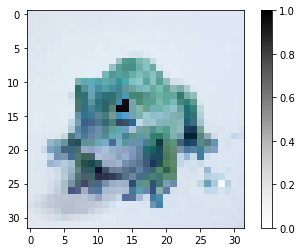

In [36]:
#Load, preprocess, and display test image
test_image_frog = cv2.imread("./test_image_frog.jpg")
test_image_frog = cv2.resize(test_image_frog, (32, 32))
test_image_frog = test_image_frog / 255.0
plt.figure()
plt.imshow(test_image_frog, cmap='Greys')
plt.colorbar()
plt.grid(False)

print("Input shape:", model1.input_shape)
test_image_frog = np.expand_dims(test_image_frog, axis=0)
print("Test image shape:", test_image_frog.shape)

In [40]:
#Predict label
prediction = model1.predict_classes(test_image_frog)
print("Predicted label:", class_names[prediction[0]])

Predicted label: truck


In [56]:
model2 = tf.keras.Sequential([
    Input(shape=input_shape),
    layers.DepthwiseConv2D(kernel_size=(3,3), padding='same', strides=(2,2)),
    layers.Conv2D(32, kernel_size=(1,1), activation="relu", strides=(1,1)),
    layers.DepthwiseConv2D(kernel_size=(3,3), padding='same', strides=(2,2)),
    layers.Conv2D(64, kernel_size=(1,1), activation="relu", strides=(1,1)),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)), 
    layers.Flatten(),
    layers.Dense(1024, activation='relu'),
    layers.Dense(10)
])
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
depthwise_conv2d_5 (Depthwis (None, 16, 16, 3)         30        
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 32)        128       
_________________________________________________________________
depthwise_conv2d_6 (Depthwis (None, 8, 8, 32)          320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 64)          2112      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)             

In [57]:
train_hist2 = model2.fit(train_images, train_labels, 
                         validation_data=(val_images, val_labels),
                         epochs=50)

Epoch 1/50
1407/1407 [==============================] - 15s 11ms/step - loss: 1.5618 - accuracy: 0.4365 - val_loss: 1.3617 - val_accuracy: 0.4938
Epoch 2/50
1407/1407 [==============================] - 29s 20ms/step - loss: 1.2388 - accuracy: 0.5570 - val_loss: 1.2065 - val_accuracy: 0.5646
Epoch 3/50
1407/1407 [==============================] - 21s 15ms/step - loss: 1.1048 - accuracy: 0.6066 - val_loss: 1.1307 - val_accuracy: 0.5988
Epoch 4/50
1407/1407 [==============================] - 16s 11ms/step - loss: 0.9910 - accuracy: 0.6496 - val_loss: 1.0929 - val_accuracy: 0.6136
Epoch 5/50
1407/1407 [==============================] - 16s 12ms/step - loss: 0.8937 - accuracy: 0.6842 - val_loss: 1.0661 - val_accuracy: 0.6198
Epoch 6/50
1407/1407 [==============================] - 15s 11ms/step - loss: 0.7930 - accuracy: 0.7209 - val_loss: 1.0427 - val_accuracy: 0.6352
Epoch 7/50
1407/1407 [==============================] - 18s 13ms/step - loss: 0.6905 - accuracy: 0.7569 - val_loss: 1.1005 -

In [58]:
test_loss2, test_acc2 = model2.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc2)

313/313 - 1s - loss: 4.0220 - accuracy: 0.6183

Test accuracy: 0.6183000206947327


In [59]:
#Predict label
prediction = model2.predict_classes(test_image_frog)
print("Predicted label:", class_names[prediction[0]])

Predicted label: airplane
